In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

In [2]:
# Read `crypto_data.csv` into Pandas.
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded.
df =  df[df['IsTrading'] == True]

# drop IsTrading
df = df.drop(columns = "IsTrading")

# Drop null values
df = df.dropna()

df



,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
# Filter for cryptocurrencies that have been mined
df = df[df["TotalCoinsMined"] > 0]


In [5]:
# delete the `CoinName` from the original dataframe since it does not contribute to the analysis
df = df.drop(columns = "CoinName")
# drop column "Unamed"
df = df.drop(columns = "Unnamed: 0")
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [6]:
# create dummy variables for `Algorithm` and `ProofType`
X = pd.get_dummies(df, columns = ["Algorithm", "ProofType"])

X


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [8]:
#* dimensionality reduction with PCA
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)


In [9]:
pca_transformed_data = pd.DataFrame(
    data=pca_transformed_data
)
pca_transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-3.136999e-14,-4.821010e-16,9.603886e-12,-0.007129,-1.319756,-0.051813,...,-6.771792e-15,-3.052752e-15,-8.627925e-15,-3.568670e-15,5.645601e-15,-5.160671e-15,3.358784e-15,-3.409778e-15,2.220766e-15,6.426593e-15
1,-0.318434,1.032331,-0.591126,0.001386,-3.141457e-14,-5.834615e-16,9.525211e-12,-0.007739,-1.322514,-0.056674,...,-6.419722e-15,-3.302109e-15,-9.051238e-15,-2.644646e-15,6.804945e-15,-4.931547e-15,2.759349e-15,-3.011060e-15,2.431272e-15,6.429249e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.740693e-14,-1.451575e-15,3.257690e-11,-0.054781,-1.542879,-0.943951,...,1.072641e-13,9.618733e-14,1.031146e-13,-2.318254e-14,-9.054807e-15,1.592732e-14,-1.353834e-13,1.321938e-14,2.207483e-14,-1.212933e-13
3,-0.145184,-1.320593,0.192813,-0.001229,9.741834e-15,1.131182e-16,-8.456718e-12,-0.002071,0.281463,0.251862,...,5.279810e-15,1.011600e-14,6.069518e-15,-4.760577e-15,-4.234022e-15,1.326413e-14,-1.317260e-14,-9.030146e-15,3.265534e-15,-9.516191e-15
4,-0.151768,-2.036192,0.396182,-0.001705,2.314928e-14,3.024917e-16,-1.173221e-11,0.027735,0.519099,0.188820,...,-1.552802e-13,-1.028183e-13,-1.339452e-13,1.342958e-14,3.693619e-14,7.047069e-14,-1.238247e-14,-1.875127e-13,9.645716e-14,7.147512e-14


In [10]:
# Activities 2 Student 05
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_transformed_data)

In [11]:
tsne_features.shape

(532, 2)

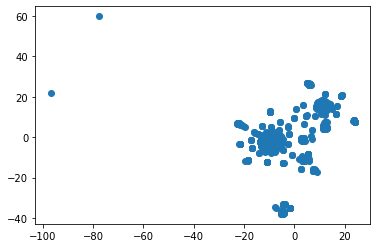

In [12]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [13]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

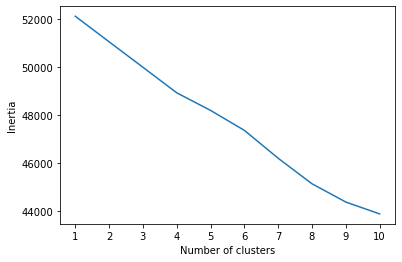

In [14]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Analysis

The visualizations reveal that there are no distinct or meaningful groups formed. This dataset may not be well suited for clustering.